In [9]:
import pandas as pd

read_file = pd.read_csv('10M_passwords.txt')
read_file.to_csv('passwords.csv', index = None)

In [12]:
df = pd.read_csv ('passwords.csv', sep = '\t', header = None)
df

,0,1
0,0000,00000000
1,0000,00001
2,0000,00001111
3,0000,000099
4,0000,00009999
...,...,...
9999995,zzzzzzzzzy,zxcvbnm
9999996,zzzzzz.zzzz,RRRRR7
9999997,zzzzzzzzzz,zzzzzzzzzz
9999998,zzzzzzzzzz8070,011070


In [13]:
df.columns = ['username','password']
df

,username,password
0,0000,00000000
1,0000,00001
2,0000,00001111
3,0000,000099
4,0000,00009999
...,...,...
9999995,zzzzzzzzzy,zxcvbnm
9999996,zzzzzz.zzzz,RRRRR7
9999997,zzzzzzzzzz,zzzzzzzzzz
9999998,zzzzzzzzzz8070,011070


Password Length Analysis

In [21]:
df['pw_len'] = df['password'].str.len()
df

,username,password,pw_len
0,0000,00000000,8.0
1,0000,00001,5.0
2,0000,00001111,8.0
3,0000,000099,6.0
4,0000,00009999,8.0
...,...,...,...
9999995,zzzzzzzzzy,zxcvbnm,7.0
9999996,zzzzzz.zzzz,RRRRR7,6.0
9999997,zzzzzzzzzz,zzzzzzzzzz,10.0
9999998,zzzzzzzzzz8070,011070,6.0


(array([2.000000e+00, 5.930000e+03, 3.451020e+05, 4.949920e+05,
        2.543976e+06, 1.662849e+06, 2.980863e+06, 6.808150e+05,
        4.712890e+05, 2.634660e+05, 1.909970e+05, 1.355870e+05,
        7.697600e+04, 5.423700e+04, 4.023000e+04, 1.529400e+04,
        1.198500e+04, 7.520000e+03, 6.231000e+03, 3.100000e+03,
        2.218000e+03, 1.297000e+03, 1.044000e+03, 5.740000e+02,
        4.680000e+02, 2.690000e+02, 2.630000e+02, 1.140000e+02,
        1.100000e+02, 4.100000e+01, 9.000000e+00, 1.900000e+01,
        1.500000e+01, 1.200000e+01, 1.600000e+01, 1.100000e+01,
        1.300000e+01, 6.000000e+00, 3.000000e+00, 2.000000e+00]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42.]),
 <BarContainer object of 40 artists>)

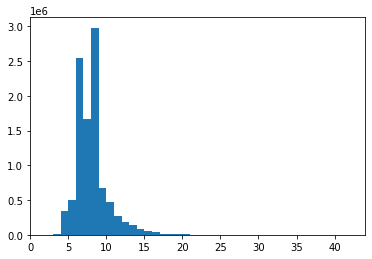

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df['pw_len'], bins=np.arange(min(df['pw_len']),max(df['pw_len'])+1))

- slight positive skew of the password lengths
- min password length is 2 and max is 42

# List of top ten Most Frequent Unique Passwords

In [32]:
df.nunique()

username    8295406
password    5189393
pw_len           41
dtype: int64

In [38]:
count_unique_pw = df.groupby('password')['username'].count()
count_unique_pw

password
!!!!!            2
!!!!!!           8
!!!!!!!          5
!!!!!!55         1
!!!!!25          1
                ..
~~~~             2
~~~~~            1
~~~~~s           1
~~~~~~           2
~~~~~~~~~~~~~    1
Name: username, Length: 5189393, dtype: int64

In [48]:
unique_pw = pd.DataFrame(count_unique_pw).sort_values(by=['username'], ascending=False)
unique_pw.head(10)

,username
password,
123456,55893
password,19580
12345678,13582
qwerty,13137
123456789,11696
12345,10938
1234,6431
111111,5682
1234567,4796
